In [1]:
import cv2 as cv
import matplotlib.pylab as plt
import numpy as np
from PIL import Image
lena_path = "./lena.bmp"

In [2]:
img = cv.imread(lena_path)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) # 从BRG装换成RGB
img_cmy = 1-img_rgb/255 # 手动计算CMY
img_yuv = cv.cvtColor(img_rgb, cv.COLOR_RGB2YUV) # 明度、色度、饱和度
img_Lab = cv.cvtColor(img_rgb, cv.COLOR_RGB2Lab) # Lab
img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)

In [3]:
def plot_img(s, t="", w=4, h=4, cmap=None):
    plt.figure(figsize=(w,h))
    plt.imshow(s, cmap=cmap)
    plt.axis('off');plt.title(t)
    plt.show()

def plot_three_imgs(s, t=['','',''], w=8, h=8, cmaps=[None,None,None]):
    if len(s) != 3: return -1;
    if len(t) == 2: t.append('');
    if len(t) == 1:
        t.append('')
        t.append('')
    f = plt.figure(figsize=(w,h))
    f.subplots_adjust(wspace=0)
    ax1 = f.add_subplot(131, title=t[0])
    ax2 = f.add_subplot(132, title=t[1])
    ax3 = f.add_subplot(133, title=t[2])
    ax = [ax1, ax2, ax3]
    for i in range(3):
        ax[i].imshow(s[i], cmap=cmaps[i]);ax[i].axis('off')
    plt.show()

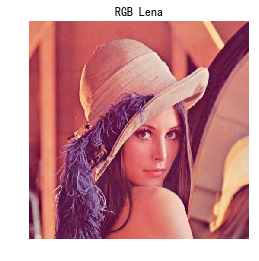

In [4]:
plot_img(img_rgb, t="RGB Lena")

## RGB

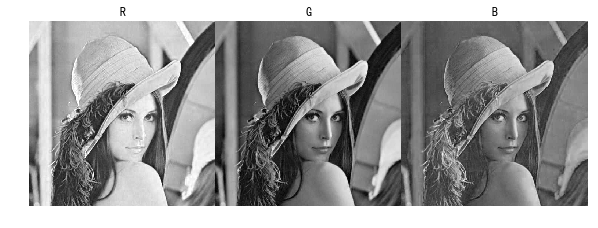

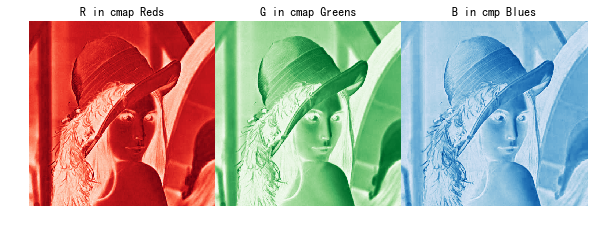

In [5]:
plot_three_imgs(
        s=cv.split(img_rgb),
        t=['R', 'G', 'B'],
        w=10, h=10, 
        cmaps=['gray', 'gray','gray']
)
plot_three_imgs(
        s=cv.split(img_rgb),
        t=['R in cmap Reds', 'G in cmap Greens', 'B in cmp Blues'],
        w=10, h=10, 
        cmaps=['Reds', 'Greens', 'Blues'])

## CMY

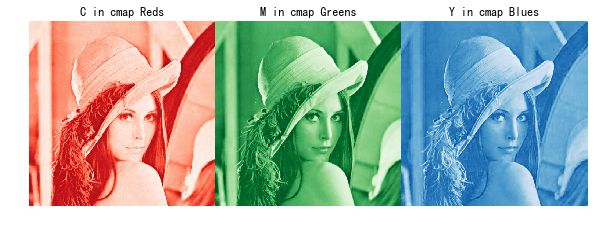

In [6]:
plot_three_imgs(
        s=cv.split(img_cmy),
        t=['C in cmap Reds', 'M in cmap Greens', 'Y in cmap Blues'],
        w=10, h=10, 
        cmaps=['Reds', 'Greens', 'Blues'])

### YUV
明度、色度、饱和度

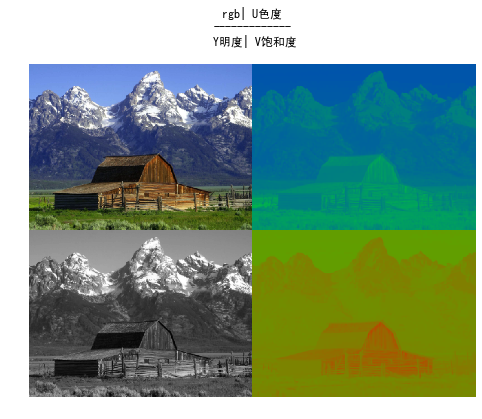

In [7]:
img_wiki = cv.imread('./a.png')
img_wiki_yuv = cv.cvtColor(img_wiki, cv.COLOR_BGR2YUV)
colormap_u = np.array([[[i,255-i,0] for i in range(256)]],dtype=np.uint8)
colormap_v = np.array([[[0,255-i,i] for i in range(256)]],dtype=np.uint8)
y = cv.cvtColor(img_wiki_yuv[:,:,0], cv.COLOR_GRAY2BGR)
u = cv.cvtColor(img_wiki_yuv[:,:,1], cv.COLOR_GRAY2BGR)
v = cv.cvtColor(img_wiki_yuv[:,:,2], cv.COLOR_GRAY2BGR)
u_mapped = cv.LUT(u, colormap_u)
v_mapped = cv.LUT(v, colormap_v)
result1 = np.vstack([img_wiki, y])
result2 = np.vstack([u_mapped, v_mapped])
result = np.hstack([result1 ,result2])
result = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plot_img(result, w=8, h=8, t="rgb| U色度\n-------------\n Y明度| V饱和度\n")

### I1, I2, I3 Ohta颜色空间

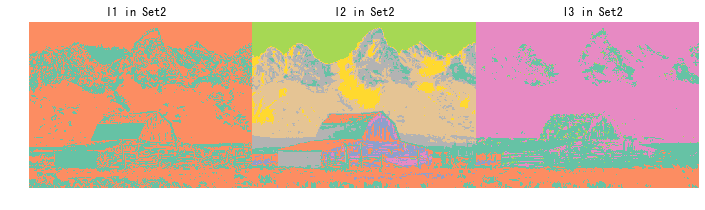

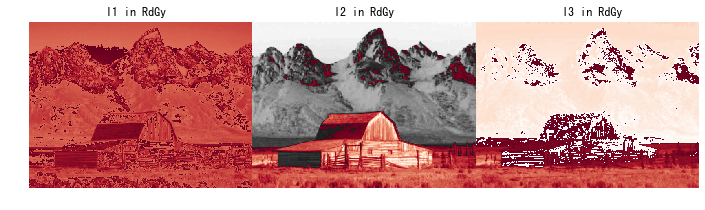

In [8]:
fR, fG, fB = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]
img_wiki_rgb = cv.cvtColor(img_wiki, cv.COLOR_BGR2RGB)
img_wiki_r, img_wiki_g, img_wiki_b = cv.split(img_wiki_rgb)
img_ohta = np.hstack([
    (img_wiki_r+img_wiki_g+img_wiki_b)/255/3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      /3,
    (img_wiki_r-img_wiki_b)/255/2, 
    (2*img_wiki_g-img_wiki_r-img_wiki_b)/255/4
])
plot_img(
    img_ohta, w=12, h=12, 
    t = 'I1 in Set2\t\t\t\t\t\t\t\t\t\t\t\t\
    I2 in Set2\t\t\t\t\t\t\t\t\t\t\t\t\
    I3 in Set2',
    cmap="Set2")
plot_img(
    img_ohta, w=12, h=12, 
    t = 'I1 in RdGy\t\t\t\t\t\t\t\t\t\t\t\t\
    I2 in RdGy\t\t\t\t\t\t\t\t\t\t\t\t\
    I3 in RdGy',
    cmap="RdGy")

### HSV

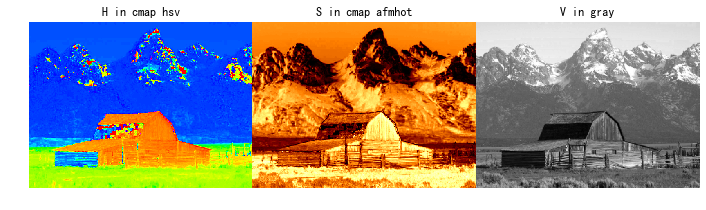

In [9]:
plot_three_imgs(
    s=cv.split(cv.cvtColor(img_wiki_rgb, cv.COLOR_RGB2HSV)),
    w = 12, h = 12,
    t = ["H in cmap hsv", "S in cmap afmhot", "V in gray"],
    cmaps=["hsv", "afmhot", "gray"]
)

### Lab
明度, 红绿, 黄蓝

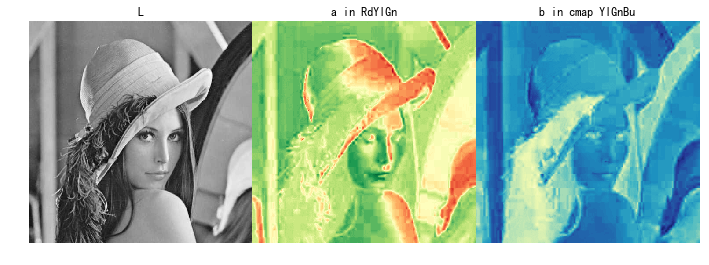

In [10]:
plot_three_imgs(
    s=cv.split(img_Lab),
    w=12, h=12, 
    t = ["L", "a in RdYlGn", "b in cmap YlGnBu"],
    cmaps=['gray', 'RdYlGn', 'YlGnBu']
)

## 2. 伪彩色增强

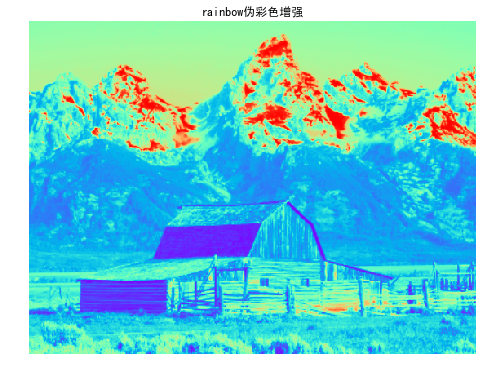

In [11]:
img_wiki_gray = cv.cvtColor(img_wiki, cv.COLOR_BGR2GRAY)
plot_img(img_wiki_gray, w=8, h=8, cmap='rainbow', t='rainbow伪彩色增强')

## 3. 真彩色增强

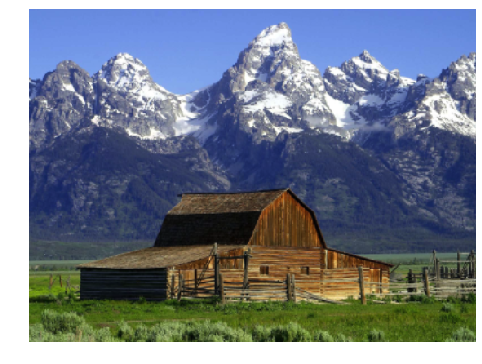

In [12]:
img_hsv = cv.cvtColor(img_wiki_rgb, cv.COLOR_RGB2HSV)
plot_img(img_wiki_rgb, w=8, h=8)

In [13]:
got_snr = lambda x,y:np.sum(y**2)/np.sum((x-y)**2)

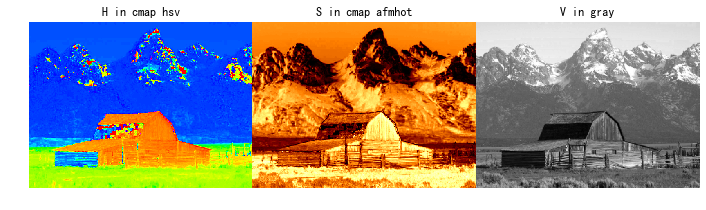

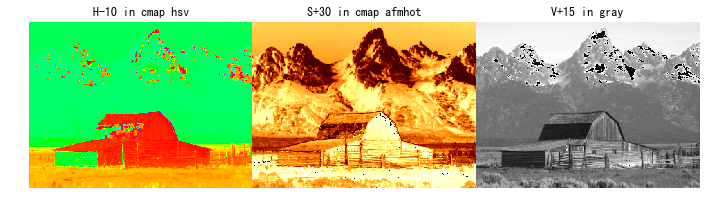

In [14]:
img_hsv_h, img_hsv_s, img_hsv_v = cv.split(img_hsv)
plot_three_imgs(
    s=cv.split(img_hsv),
    w = 12, h = 12,
    t = ["H in cmap hsv", "S in cmap afmhot", "V in gray"],
    cmaps=["hsv", "afmhot", "gray"]
)

plot_three_imgs(
    s=[img_hsv_h-10, img_hsv_s+30, img_hsv_v+15],
    w = 12, h = 12,
    t = ["H-10 in cmap hsv", "S+30 in cmap afmhot", "V+15 in gray"],
    cmaps=["hsv", "afmhot", "gray"]
)

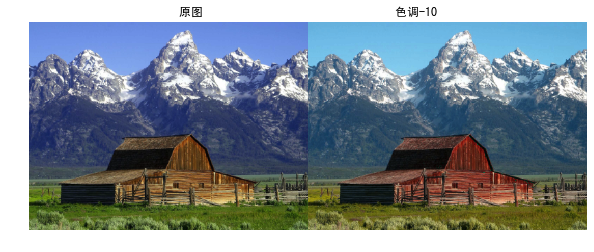

信噪比 3.309894203854215


In [15]:
img_hsv_h, img_hsv_s, img_hsv_v = cv.split(img_hsv)
img_hsv_o = cv.merge((img_hsv_h-10, img_hsv_s, img_hsv_v))
img_rgb_by_hsv = cv.cvtColor(img_hsv_o, cv.COLOR_HSV2RGB)
plot_img(np.hstack([img_wiki_rgb, img_rgb_by_hsv]), w=10, h=10, 
         t="原图\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t色调-10")
print('信噪比', got_snr(img_wiki_rgb, img_rgb_by_hsv))

图像的色调明显下降，蓝色的天空变成青色

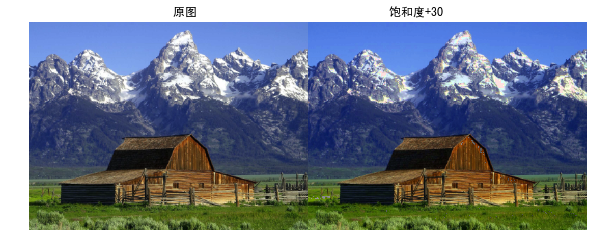

信噪比 1.6343748665624624


In [16]:
img_hsv_h, img_hsv_s, img_hsv_v = cv.split(img_hsv)
img_hsv_o = cv.merge((img_hsv_h, img_hsv_s+30, img_hsv_v))
img_rgb_by_hsv = cv.cvtColor(img_hsv_o, cv.COLOR_HSV2RGB)
plot_img(np.hstack([img_wiki_rgb, img_rgb_by_hsv]), w=10, h=10,
        t="原图\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t饱和度+30")
print('信噪比', got_snr(img_wiki_rgb, img_rgb_by_hsv))

图像的饱和度明显上升, 日照白雪的区域显得更突出了，蓝天变得更白

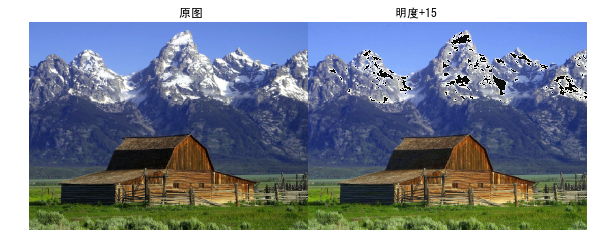

信噪比 0.7847547743263964


In [17]:
img_hsv_h, img_hsv_s, img_hsv_v = cv.split(img_hsv)
img_hsv_o = cv.merge((img_hsv_h, img_hsv_s, img_hsv_v+15))
img_rgb_by_hsv = cv.cvtColor(img_hsv_o, cv.COLOR_HSV2RGB)
plot_img(np.hstack([img_wiki_rgb, img_rgb_by_hsv]), w=10, h=10,
        t="原图\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t明度+15")
print('信噪比', got_snr(img_wiki_rgb, img_rgb_by_hsv))